In [45]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit, train_test_split
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tqdm import tqdm

# Preprocessing

### Import Dataset

In [67]:
# Reading the CSV file into a pandas DataFrame
# The 'index_col=0' argument is used to set the first column (column 0) as the index of the DataFrame
df = pd.read_csv("../Datasets/Dataset01/data1.csv", index_col=0, low_memory=False)

# Displaying the first 5 rows of the DataFrame to verify the data has been loaded correctly
df.head()

SEQ12179     SEQ12182     SEQ12199     SEQ12196     SEQ12201  \
Diagnosis            DR       Non-DR           DR       Non-DR           DR   
OR4F5       5.181797022  4.727253356  5.236380368  5.145955591  5.467903931   
AL627309.1  6.179014565  6.085530542  7.428169178   6.90402372  7.098593711   
OR4F29      4.727253356  5.102763929  5.349217022  5.145955591  5.253815068   
OR4F16      4.727253356  5.256827653  5.443627329  4.727253356  5.420998474   

               SEQ12155     SEQ12121     SEQ12164     SEQ12102     SEQ12118  \
Diagnosis        Non-DR           DR       Non-DR           DR       Non-DR   
OR4F5       5.393941571  5.232717081  4.727253356  5.178449202  5.070517615   
AL627309.1  6.115691398  6.970339413  6.178345606   6.96397323  7.699004505   
OR4F29      5.360281624  5.344764019   5.25917524  4.988457422  5.319050063   
OR4F16      5.200750919  5.291667543  5.376915214  5.178449202  5.319050063   

            ...     SEQ12175     SEQ12197     SEQ12159     SEQ12153  \
Diagnosis   ...       Non-DR           DR       Non-DR           DR   
OR4F5       ...  5.363778792   5.07053304  5.366083956  5.390262833   
AL627309.1  ...  7.503249287  6.234572961  6.780598798  6.233049344   
OR4F29      ...  5.363778792   5.07053304  5.098081344  5.075706157   
OR4F16      ...  5.437502418   5.21159248  5.098081344  5.294007104   

               SEQ12171     SEQ12152     SEQ12203     SEQ12173     SEQ12151  \
Diagnosis        Non-DR           DR           DR       Non-DR           DR   
OR4F5       5.175770019  4.727253356  5.296185108  5.239277716  5.174407188   
AL627309.1  6.605649607  6.252878989   7.25458745  6.071908062  7.287373649   
OR4F29      5.116068543  5.138388163  5.296185108  5.023901827  5.174407188   
OR4F16      5.275482171  5.306751582  5.382809844  4.727253356  5.174407188   

               SEQ12172  
Diagnosis        Non-DR  
OR4F5        5.17967925  
AL627309.1   5.81412704  
OR4F29      5.364511873  
OR4F16       5.17967925  

[5 rows x 70 columns]

### Transpose the dataset

In [11]:
# Transposing the DataFrame, which swaps the rows and columns
# The original rows become columns, and the original columns become rows
df = df.T

# Displaying the first 5 rows of the transposed DataFrame to verify the transformation
df.head()

Diagnosis        OR4F5   AL627309.1       OR4F29       OR4F16  \
SEQ12179        DR  5.181797022  6.179014565  4.727253356  4.727253356   
SEQ12182    Non-DR  4.727253356  6.085530542  5.102763929  5.256827653   
SEQ12199        DR  5.236380368  7.428169178  5.349217022  5.443627329   
SEQ12196    Non-DR  5.145955591   6.90402372  5.145955591  4.727253356   
SEQ12201        DR  5.467903931  7.098593711  5.253815068  5.420998474   

           AL669831.1   AL645608.2       SAMD11        NOC2L       KLHL17  \
SEQ12179  5.181797022  4.727253356  6.448955465   6.66895539   6.34839585   
SEQ12182   5.37406351  5.634631559  6.291008171  6.558533119  6.039314314   
SEQ12199  5.236380368  5.236380368  6.733031124  7.013538725   6.75690264   
SEQ12196  5.210169927  5.266549244  6.653595459  6.986734129   6.69889087   
SEQ12201  5.100616046  5.315164011    6.6632802  6.852839475  6.780345701   

          ...    MT-CO2   MT-ATP8   MT-ATP6    MT-CO3    MT-ND3   MT-ND4L  \
SEQ12179  ...  5.181797  4.727253  4.727253  4.727253  4.727253  4.727253   
SEQ12182  ...  4.727253  4.727253  4.727253  4.727253  4.727253  4.727253   
SEQ12199  ...  4.727253  4.727253  4.727253   5.52619  4.727253  4.727253   
SEQ12196  ...  4.969556  4.727253  4.727253  4.727253  4.727253  4.727253   
SEQ12201  ...  5.100616  4.727253  4.727253  4.727253  4.727253  4.727253   

            MT-ND4    MT-ND5    MT-ND6    MT-CYB  
SEQ12179  4.727253  4.727253  4.727253  5.181797  
SEQ12182  5.102764  4.727253  4.727253  5.374064  
SEQ12199   5.23638  4.727253  4.727253   5.23638  
SEQ12196  4.727253  4.969556  4.727253   5.06952  
SEQ12201  4.727253  4.991628  4.727253  4.727253  

[5 rows x 18602 columns]

In [13]:
# Generating descriptive statistics for the DataFrame
# This includes metrics like count, mean, standard deviation, min, max, and percentiles (25%, 50%, 75%)
# It is useful for getting an overview of the numerical data in the DataFrame
df.describe()

Diagnosis        OR4F5   AL627309.1       OR4F29       OR4F16  \
count         70           70           70           70           70   
unique         2           66           70           67           63   
top           DR  4.727253356  6.179014565  4.727253356  4.727253356   
freq          35            5            1            4            8   

         AL669831.1   AL645608.2       SAMD11       NOC2L      KLHL17  ...  \
count            70           70           70          70          70  ...   
unique           70           67           70          70          70  ...   
top     5.181797022  4.727253356  6.448955465  6.66895539  6.34839585  ...   
freq              1            4            1           1           1  ...   

           MT-CO2    MT-ATP8    MT-ATP6     MT-CO3     MT-ND3    MT-ND4L  \
count   70.000000  70.000000  70.000000  70.000000  70.000000  70.000000   
unique  37.000000  11.000000  25.000000  33.000000  11.000000  14.000000   
top      4.727253   4.727253   4.727253   4.727253   4.727253   4.727253   
freq    34.000000  60.000000  46.000000  38.000000  60.000000  57.000000   

           MT-ND4     MT-ND5     MT-ND6     MT-CYB  
count   70.000000  70.000000  70.000000  70.000000  
unique  40.000000  49.000000  12.000000  40.000000  
top      4.727253   4.727253   4.727253   4.727253  
freq    31.000000  22.000000  59.000000  31.000000  

[4 rows x 18602 columns]

In [14]:
# Displaying the data types of each column in the DataFrame
# It shows whether each column is an integer, float, object (string), etc.
df.dtypes

Diagnosis     object
OR4F5         object
AL627309.1    object
OR4F29        object
OR4F16        object
               ...  
MT-ND4L       object
MT-ND4        object
MT-ND5        object
MT-ND6        object
MT-CYB        object
Length: 18602, dtype: object

In [17]:
# Checking for missing values (null values) in each column of the DataFrame
# The 'isnull()' method returns a DataFrame with True for null values and False otherwise
# The 'sum()' method adds up the True values (which are considered as 1) to give the total count of nulls per column
df.isnull().sum()

Diagnosis     0
OR4F5         0
AL627309.1    0
OR4F29        0
OR4F16        0
             ..
MT-ND4L       0
MT-ND4        0
MT-ND5        0
MT-ND6        0
MT-CYB        0
Length: 18602, dtype: int64

### Convert Diagnosis to Catogarical

In [19]:
# Converting the 'Diagnosis' column to a categorical data type
# The 'astype('category')' converts the 'Diagnosis' column to the categorical type
# The 'cat.codes' attribute then assigns a numerical code to each category
# This is useful for transforming categorical data into numeric form for models that require numeric input
df["Diagnosis"] = df["Diagnosis"].astype('category').cat.codes

# Displaying the first 5 rows of the DataFrame to verify the transformation
df.head()

Diagnosis        OR4F5   AL627309.1       OR4F29       OR4F16  \
SEQ12179          0  5.181797022  6.179014565  4.727253356  4.727253356   
SEQ12182          1  4.727253356  6.085530542  5.102763929  5.256827653   
SEQ12199          0  5.236380368  7.428169178  5.349217022  5.443627329   
SEQ12196          1  5.145955591   6.90402372  5.145955591  4.727253356   
SEQ12201          0  5.467903931  7.098593711  5.253815068  5.420998474   

           AL669831.1   AL645608.2       SAMD11        NOC2L       KLHL17  \
SEQ12179  5.181797022  4.727253356  6.448955465   6.66895539   6.34839585   
SEQ12182   5.37406351  5.634631559  6.291008171  6.558533119  6.039314314   
SEQ12199  5.236380368  5.236380368  6.733031124  7.013538725   6.75690264   
SEQ12196  5.210169927  5.266549244  6.653595459  6.986734129   6.69889087   
SEQ12201  5.100616046  5.315164011    6.6632802  6.852839475  6.780345701   

          ...    MT-CO2   MT-ATP8   MT-ATP6    MT-CO3    MT-ND3   MT-ND4L  \
SEQ12179  ...  5.181797  4.727253  4.727253  4.727253  4.727253  4.727253   
SEQ12182  ...  4.727253  4.727253  4.727253  4.727253  4.727253  4.727253   
SEQ12199  ...  4.727253  4.727253  4.727253   5.52619  4.727253  4.727253   
SEQ12196  ...  4.969556  4.727253  4.727253  4.727253  4.727253  4.727253   
SEQ12201  ...  5.100616  4.727253  4.727253  4.727253  4.727253  4.727253   

            MT-ND4    MT-ND5    MT-ND6    MT-CYB  
SEQ12179  4.727253  4.727253  4.727253  5.181797  
SEQ12182  5.102764  4.727253  4.727253  5.374064  
SEQ12199   5.23638  4.727253  4.727253   5.23638  
SEQ12196  4.727253  4.969556  4.727253   5.06952  
SEQ12201  4.727253  4.991628  4.727253  4.727253  

[5 rows x 18602 columns]

### Change Data types to numerical

In [21]:
# Iterating over each column in the DataFrame
for col in df.columns:
    # Converting each column to a numeric data type
    # 'errors="coerce"' means that if a value cannot be converted to a number, it will be replaced with NaN (Not a Number)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Displaying the data types of all columns after conversion
df.dtypes

Diagnosis        int8
OR4F5         float64
AL627309.1    float64
OR4F29        float64
OR4F16        float64
               ...   
MT-ND4L       float64
MT-ND4        float64
MT-ND5        float64
MT-ND6        float64
MT-CYB        float64
Length: 18602, dtype: object

In [25]:
# Displaying the first 5 rows of the DataFrame
df.head()

Diagnosis     OR4F5  AL627309.1    OR4F29    OR4F16  AL669831.1  \
SEQ12179          0  5.181797    6.179015  4.727253  4.727253    5.181797   
SEQ12182          1  4.727253    6.085531  5.102764  5.256828    5.374064   
SEQ12199          0  5.236380    7.428169  5.349217  5.443627    5.236380   
SEQ12196          1  5.145956    6.904024  5.145956  4.727253    5.210170   
SEQ12201          0  5.467904    7.098594  5.253815  5.420998    5.100616   

          AL645608.2    SAMD11     NOC2L    KLHL17  ...    MT-CO2   MT-ATP8  \
SEQ12179    4.727253  6.448955  6.668955  6.348396  ...  5.181797  4.727253   
SEQ12182    5.634632  6.291008  6.558533  6.039314  ...  4.727253  4.727253   
SEQ12199    5.236380  6.733031  7.013539  6.756903  ...  4.727253  4.727253   
SEQ12196    5.266549  6.653595  6.986734  6.698891  ...  4.969556  4.727253   
SEQ12201    5.315164  6.663280  6.852839  6.780346  ...  5.100616  4.727253   

           MT-ATP6    MT-CO3    MT-ND3   MT-ND4L    MT-ND4    MT-ND5  \
SEQ12179  4.727253  4.727253  4.727253  4.727253  4.727253  4.727253   
SEQ12182  4.727253  4.727253  4.727253  4.727253  5.102764  4.727253   
SEQ12199  4.727253  5.526190  4.727253  4.727253  5.236380  4.727253   
SEQ12196  4.727253  4.727253  4.727253  4.727253  4.727253  4.969556   
SEQ12201  4.727253  4.727253  4.727253  4.727253  4.727253  4.991628   

            MT-ND6    MT-CYB  
SEQ12179  4.727253  5.181797  
SEQ12182  4.727253  5.374064  
SEQ12199  4.727253  5.236380  
SEQ12196  4.727253  5.069520  
SEQ12201  4.727253  4.727253  

[5 rows x 18602 columns]

### Save df to data2.csv

In [27]:
# Saving the DataFrame to a CSV file
# The file will be saved at the specified path '../Datasets/Dataset01/data2.csv'
# The index column of the DataFrame will also be saved in the CSV file by default
df.to_csv("../Datasets/Dataset01/data2.csv")

# Feature Selection

### Select best Feature Selection Algorithm

In [29]:
# Reading the CSV file into a DataFrame and setting the first column as the index
df = pd.read_csv("../Datasets/Dataset01/data2.csv", index_col=0)

# Separating features (all columns except 'Diagnosis') and target (the 'Diagnosis' column)
features = df.drop('Diagnosis', axis=1)
target = df['Diagnosis']

# Creating an empty DataFrame to store the results of feature selection
result_df = pd.DataFrame(
    columns=['Feature Selection Algorithm', 'Feature Count', 'Cross Validation Score'])

# List of different feature counts to evaluate
feature_counts = [20, 30, 40, 50, 60, 70]

# Defining feature selection algorithms to be used
# Note: For 'Feature Importance', we fit a RandomForestClassifier once and use its feature importances
feature_selection_algorithms = [
    ('Information Gain (Mutual info)', mutual_info_classif),
    ('Correlation Coefficient', f_classif),
    ('Chi-Square', chi2),
    ('Feature Importance', RandomForestClassifier().fit(
        features, target).feature_importances_)
]

# Setting up K-Fold cross-validation with 5 splits
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Looping through each feature selection algorithm
for algo_name, algo_func in feature_selection_algorithms:
    # Looping through each feature count to evaluate
    for count in feature_counts:
        if algo_name == 'Feature Importance':
            # For 'Feature Importance', sort features by importance and select the top ones
            selected_features = features.columns[algo_func.argsort()[-count:][::-1]]
        else:
            # For other algorithms, compute the scores and select the top features
            selected_features = features.columns[algo_func(features, target)[0].argsort()[-count:][::-1]]

        # Initializing a RandomForestClassifier
        clf = RandomForestClassifier()
        # Performing cross-validation and calculating scores
        cv_scores = cross_val_score(clf, features[selected_features], target, cv=cv)

        # Appending the results to the result_df DataFrame
        result_df = pd.concat([result_df, pd.DataFrame({
            'Feature Selection Algorithm': [algo_name],
            'Feature Count': [count],
            'Cross Validation Score': [f'{cv_scores.mean():.2f}+/-{cv_scores.std():.2f}']
        })], ignore_index=True)

# Printing the resulting DataFrame containing the performance of each feature selection method
print(result_df)

       Feature Selection Algorithm Feature Count Cross Validation Score
0   Information Gain (Mutual info)            20            0.47+/-0.07
1   Information Gain (Mutual info)            30            0.49+/-0.07
2   Information Gain (Mutual info)            40            0.47+/-0.07
3   Information Gain (Mutual info)            50            0.49+/-0.07
4   Information Gain (Mutual info)            60            0.49+/-0.07
5   Information Gain (Mutual info)            70            0.47+/-0.07
6          Correlation Coefficient            20            0.80+/-0.11
7          Correlation Coefficient            30            0.84+/-0.05
8          Correlation Coefficient            40            0.86+/-0.10
9          Correlation Coefficient            50            0.86+/-0.06
10         Correlation Coefficient            60            0.90+/-0.07
11         Correlation Coefficient            70            0.89+/-0.07
12                      Chi-Square            20            0.80

### Check Feature Importance using Correlation Coefficient

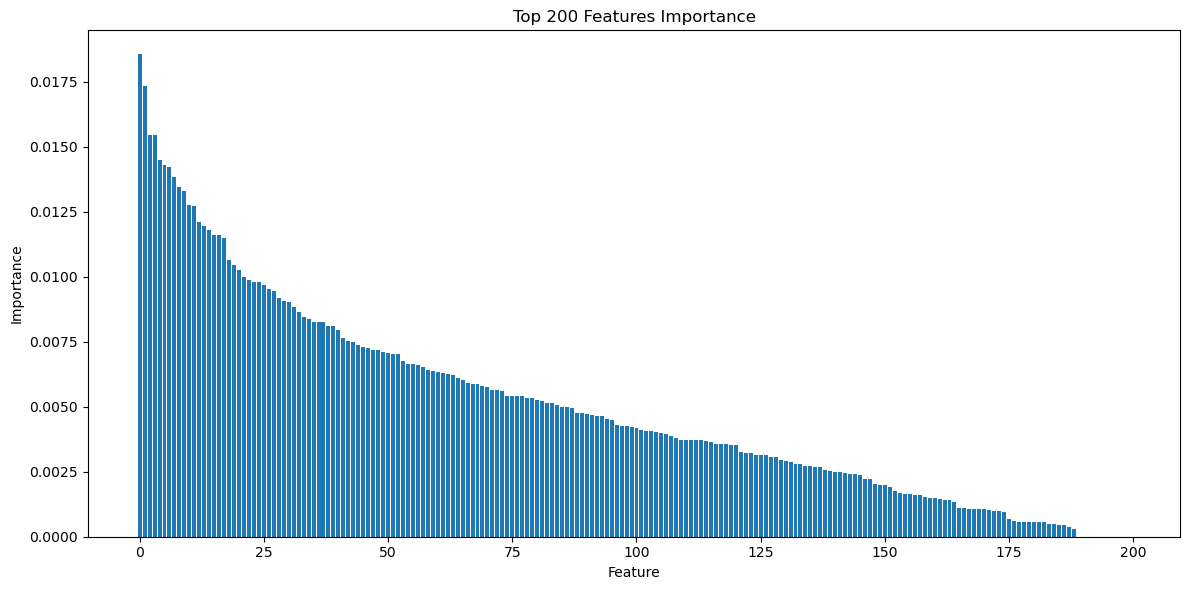

Last important feature:  189


In [30]:
# Reading the CSV file into a DataFrame and setting the first column as the index
df = pd.read_csv("../Datasets/Dataset01/data2.csv", index_col=0)

# Separating features (all columns except 'Diagnosis') and target (the 'Diagnosis' column)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Getting the feature names from the DataFrame
Feature_Names = X.columns

# Defining the number of top features to select
k_values = [200]

# Creating a dictionary to store selected features for each value of k
selected_features_dict = {}

# Looping through each value of k
for k in k_values:
    # Calculating the correlation of each feature with the target variable
    corr_matrix = X.corrwith(y)
    # Taking the absolute values of the correlations
    corr_matrix_abs = corr_matrix.abs()

    # Selecting the top k features with the highest absolute correlation values
    selected_features = corr_matrix_abs.nlargest(k).index.tolist()

    # Storing the selected features in the dictionary
    selected_features_dict[k] = selected_features

    # Initializing and fitting a RandomForestClassifier using the selected features
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X[selected_features], y)
    # Getting feature importances from the trained classifier
    feature_importances = clf.feature_importances_

    # Sorting the feature importances in descending order
    sorted_idx = np.argsort(feature_importances)[::-1]

    # Plotting the feature importances
    plt.figure(figsize=(12, 6))
    plt.title(f"Top {k} Features Importance")
    plt.bar(range(len(sorted_idx)),
            feature_importances[sorted_idx], align="center")
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

    # Finding the indices of features with zero importance
    zero_importance_index = np.where(feature_importances == 0)[0]
    # Printing the number of important features
    print("Last important feature: ", k - len(zero_importance_index))

### Feature Selection

In [ ]:
# Reading the CSV file into a DataFrame and setting the first column as the index
df = pd.read_csv("../Datasets/Dataset01/data2.csv", index_col=0)

# Separating features (all columns except 'Diagnosis') and target (the 'Diagnosis' column)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Defining a range of feature counts to evaluate
feature_counts = list(range(1, 71))

# Selecting features based on their ANOVA F-value scores in descending order
# f_classif returns F-values and p-values; we sort features by F-values
selected_features = X.columns[f_classif(X, y)[0].argsort()[::-1]]

# Creating a dictionary to store datasets with different numbers of selected features
datasets = {}

# Looping through each count in feature_counts
for count in feature_counts:
    # Selecting the top 'count' features from the sorted list
    # Creating a new DataFrame with these features and the target variable
    datasets[count] = X[selected_features[:count]].copy()
    datasets[count]['Diagnosis'] = y

    # Saving the dataset to a CSV file
    # The file name includes the number of features
    datasets[count].to_csv(f'../Datasets/Dataset01/Feature_Select/dataset_{count}.csv', index=True)

## Model Building

### Check CV Score for Different Models

In [9]:
# Define the range of feature counts to evaluate
feature_counts = list(range(45, 55))

# Define the models to evaluate
models = {
    "SVM": SVC(kernel='linear'),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
}

# Initialize a list to store results
results_list = []

# Iterate over the feature counts with a progress bar
for count in tqdm(feature_counts, desc="Feature Count Progress", colour='green'):
    # Load the dataset corresponding to the current feature count
    file_path = f"../Datasets/Dataset01/Feature_Select/dataset_{count}.csv"
    df = pd.read_csv(file_path, index_col=0)

    # Separate features and target variable
    X = df.drop('Diagnosis', axis=1)
    y = df['Diagnosis']

    # Evaluate each model
    for model_name, model in models.items():
        # Define cross-validation strategy
        cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
        # Perform cross-validation and get scores
        scores = cross_val_score(model, X, y, cv=cv)
        mean_score = np.mean(scores)  # Mean of the cross-validation scores
        std_score = np.std(scores)    # Standard deviation of the cross-validation scores
        result = f"{mean_score:.4f} +/- {std_score:.4f}"  # Format the result as a string

        # Append results to the list as a DataFrame
        results_list.append(pd.DataFrame({
            "Model Name": [model_name],
            "Feature Count": [count],
            "CV Score (Mean)": [mean_score],
            "Std": [std_score]
        }))

# Concatenate all DataFrames in the list into a single DataFrame
results = pd.concat(results_list, ignore_index=True)

# Save the results to a CSV file
results.to_csv("../Datasets/Dataset01/Feature_Select/results.csv", index=False)

Feature Count Progress: 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


In [41]:
# Load the results CSV file into a DataFrame
df = pd.read_csv("../Datasets/Dataset01/Feature_Select/results.csv")

# Sort the DataFrame by 'CV Score (Mean)' in descending order and 'Std' in ascending order
# This prioritizes higher mean CV scores and lower standard deviations
sorted_df = df.sort_values(by=['CV Score (Mean)', 'Std'], ascending=[False, True])

# Print the top 10 rows of the sorted DataFrame
print(sorted_df.head(10))

             Model Name  Feature Count  CV Score (Mean)       Std
14  Logistic Regression             48         0.957143  0.034993
20                  SVM             50         0.947143  0.034993
24                  SVM             51         0.947143  0.034993
28                  SVM             52         0.947143  0.034993
32                  SVM             53         0.947143  0.034993
36                  SVM             54         0.947143  0.034993
10  Logistic Regression             47         0.942857  0.028571
16                  SVM             49         0.942857  0.028571
18  Logistic Regression             49         0.942857  0.028571
22  Logistic Regression             50         0.942857  0.028571


### Compare Accuracies

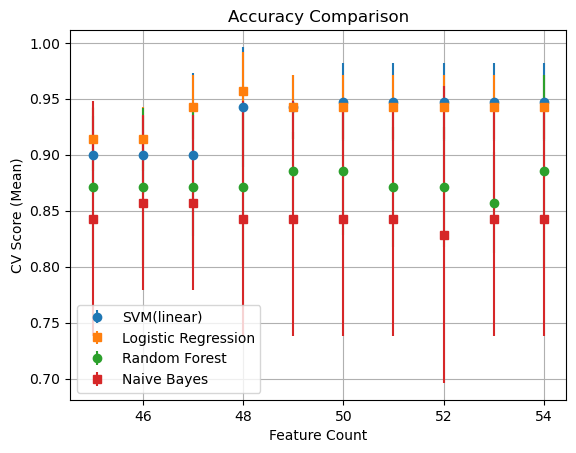

In [43]:
# Reading the data from CSV file
data = pd.read_csv('../Datasets/Dataset01/Feature_Select/results.csv')

# Separate data
svm_data = data[data['Model Name'] == 'SVM']
lr_data = data[data['Model Name'] == 'Logistic Regression']
rf_data = data[data['Model Name'] == 'Random Forest']
nb_data = data[data['Model Name'] == 'Naive Bayes']

# Plotting SVM data
plt.errorbar(svm_data['Feature Count'], svm_data['CV Score (Mean)'],
             yerr=svm_data['Std'], fmt='o', label='SVM(linear)')

# Plotting Logistic Regression data
plt.errorbar(lr_data['Feature Count'], lr_data['CV Score (Mean)'],
             yerr=lr_data['Std'], fmt='s', label='Logistic Regression')

# Plotting RF data
plt.errorbar(rf_data['Feature Count'], rf_data['CV Score (Mean)'],
             yerr=rf_data['Std'], fmt='o', label='Random Forest')

# Plotting NB data
plt.errorbar(nb_data['Feature Count'], nb_data['CV Score (Mean)'],
             yerr=nb_data['Std'], fmt='s', label='Naive Bayes')



# Adding labels and title
plt.xlabel('Feature Count')
plt.ylabel('CV Score (Mean)')
plt.title('Accuracy Comparison')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

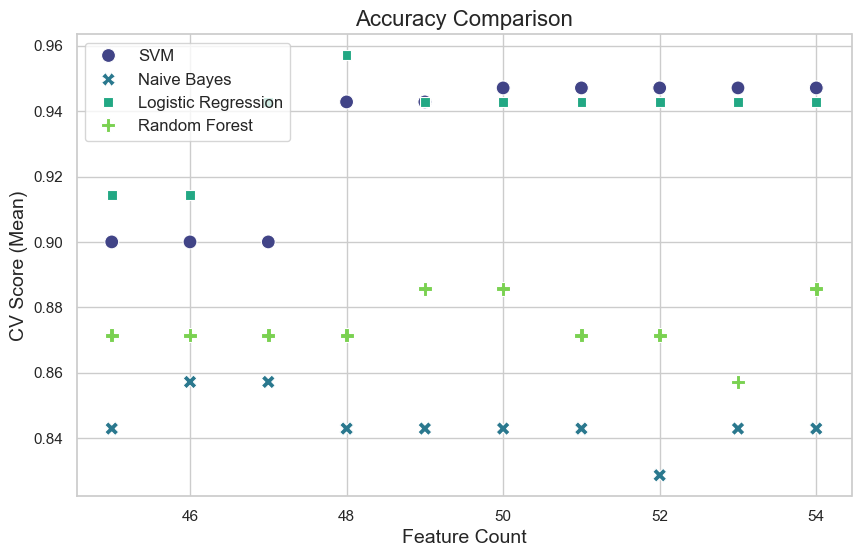

In [51]:
# Reading the data from CSV file
data = pd.read_csv('../Datasets/Dataset01/Feature_Select/results.csv')

# Setting seaborn style
sns.set(style="whitegrid")

# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting all models in a single scatterplot
sns.scatterplot(data=data, x='Feature Count', y='CV Score (Mean)', hue='Model Name', s=100, style='Model Name', palette='viridis')

# Adding labels and title
plt.xlabel('Feature Count', fontsize=14)
plt.ylabel('CV Score (Mean)', fontsize=14)
plt.title('Accuracy Comparison', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Show plot
plt.show()

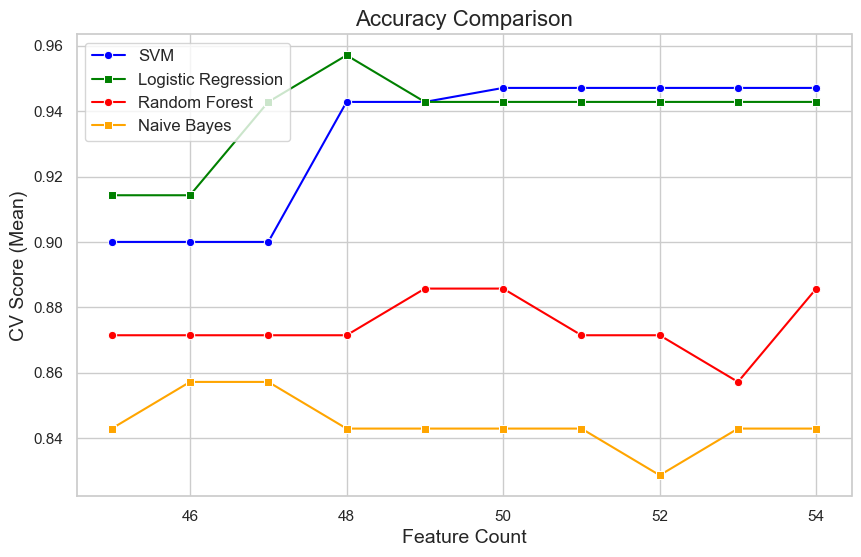

In [53]:
# Reading the data from CSV file
data = pd.read_csv('../Datasets/Dataset01/Feature_Select/results.csv')

# Setting seaborn style
sns.set(style="whitegrid")

# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting SVM data with lines
svm_data = data[data['Model Name'] == 'SVM']
sns.lineplot(data=svm_data, x='Feature Count', y='CV Score (Mean)',
             marker='o', label='SVM', color='blue')

# Plotting Logistic Regression data with lines
lr_data = data[data['Model Name'] == 'Logistic Regression']
sns.lineplot(data=lr_data, x='Feature Count', y='CV Score (Mean)',
             marker='s', label='Logistic Regression', color='green')

# Plotting RF data with lines
rf_data = data[data['Model Name'] == 'Random Forest']
sns.lineplot(data=rf_data, x='Feature Count', y='CV Score (Mean)',
             marker='o', label='Random Forest', color='red')

# Plotting NB data with lines
nb_data = data[data['Model Name'] == 'Naive Bayes']
sns.lineplot(data=nb_data, x='Feature Count', y='CV Score (Mean)',
             marker='s', label='Naive Bayes', color='orange')

# Adding labels and title
plt.xlabel('Feature Count', fontsize=14)
plt.ylabel('CV Score (Mean)', fontsize=14)
plt.title('Accuracy Comparison', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Show plot
plt.show()

### Check feature selection again with Logistic Regression

In [55]:
# Load the dataset
df = pd.read_csv("../Datasets/Dataset01/data2.csv", index_col=0)

# Separate features and target
features = df.drop('Diagnosis', axis=1)
target = df['Diagnosis']

# Create an empty DataFrame to store results
result_df = pd.DataFrame(columns=['Feature Selection Algorithm', 'Feature Count', 'Cross Validation Score'])

# Define the number of features to test for each algorithm
feature_counts = [25, 50, 100, 150, 200]

# Define the feature selection algorithms to be used
feature_selection_algorithms = [
    ('Information Gain (Mutual info)', mutual_info_classif),
    ('Correlation Coefficient', f_classif),
    ('Chi-Square', chi2),
    ('Feature Importance', RandomForestClassifier().fit(features, target).feature_importances_)
]

# Set up 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each feature selection algorithm
for algo_name, algo_func in feature_selection_algorithms:
    # Loop through each feature count
    for count in feature_counts:
        # For 'Feature Importance', sort by feature importance scores
        if algo_name == 'Feature Importance':
            selected_features = features.columns[algo_func.argsort()[-count:][::-1]]
        # For other algorithms, select features based on ranking
        else:
            selected_features = features.columns[algo_func(features, target)[0].argsort()[-count:][::-1]]
        
        # Train a logistic regression model on selected features
        clf = LogisticRegression(max_iter=1000)
        cv_scores = cross_val_score(clf, features[selected_features], target, cv=cv)

        # Add the results to the DataFrame
        result_df = pd.concat([result_df, pd.DataFrame({
            'Feature Selection Algorithm': [algo_name],
            'Feature Count': [count],
            'Cross Validation Score': [f'{cv_scores.mean():.2f}+/-{cv_scores.std():.2f}']
        })], ignore_index=True)

# Print the result
print(result_df)

       Feature Selection Algorithm Feature Count Cross Validation Score
0   Information Gain (Mutual info)            25            0.47+/-0.03
1   Information Gain (Mutual info)            50            0.47+/-0.03
2   Information Gain (Mutual info)           100            0.47+/-0.03
3   Information Gain (Mutual info)           150            0.47+/-0.03
4   Information Gain (Mutual info)           200            0.47+/-0.03
5          Correlation Coefficient            25            0.86+/-0.09
6          Correlation Coefficient            50            0.93+/-0.09
7          Correlation Coefficient           100            0.90+/-0.09
8          Correlation Coefficient           150            0.94+/-0.05
9          Correlation Coefficient           200            0.94+/-0.05
10                      Chi-Square            25            0.83+/-0.12
11                      Chi-Square            50            0.76+/-0.12
12                      Chi-Square           100            0.89

### Plot selected features with name

In [57]:
# Define the feature count
feature_count = 51

# Load the dataset corresponding to the specified feature count
data = pd.read_csv(f'../Datasets/Dataset01/Feature_Select/dataset_{feature_count}.csv')

# Separate features by dropping the 'Diagnosis' column
X = data.drop('Diagnosis', axis=1)

# Create a DataFrame with the feature names
feature_names_df = pd.DataFrame({'Feature Names': X.columns})

# Save the DataFrame of feature names to a CSV file
feature_names_df.to_csv("../Datasets/Dataset01/Feature_Select/feature_names.csv", index=False)

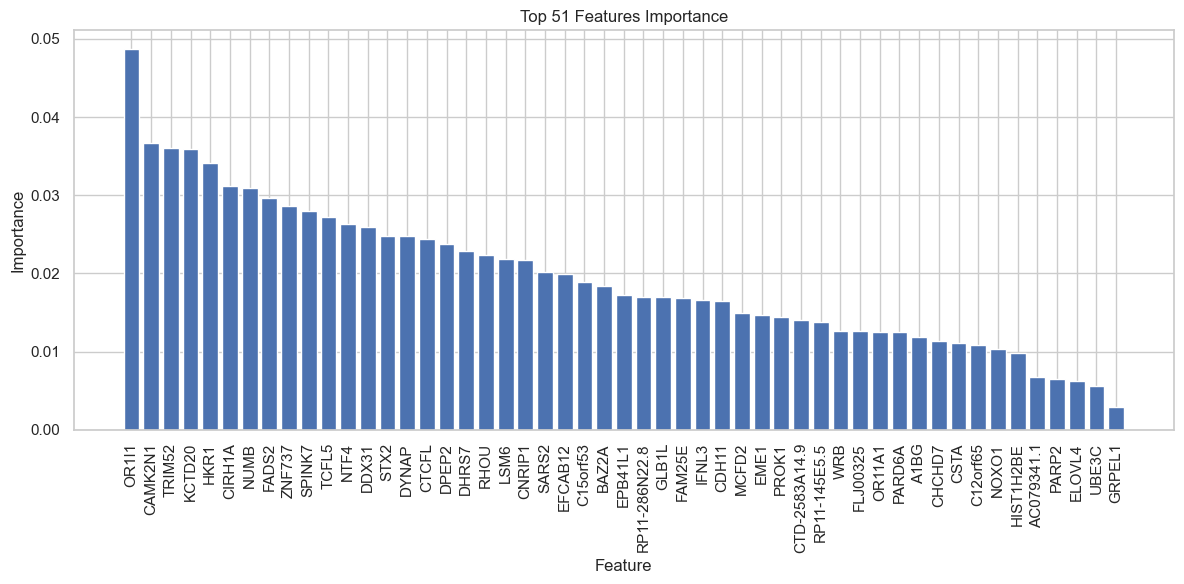

In [59]:
# Load the dataset
df = pd.read_csv("../Datasets/Dataset01/data2.csv", index_col=0)

# Separate features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Get feature names
Feature_Names = X.columns

# Define the number of top features to consider
k_values = [51]

# Dictionary to store selected features
selected_features_dict = {}

# Loop through each value of k (number of top features)
for k in k_values:
    # Perform ANOVA F-value feature selection
    _, p_values = f_classif(X, y)
    
    # Select top k features with the lowest p-values
    selected_features = np.argsort(p_values)[:k]
    
    # Store the selected features
    selected_features_dict[k] = selected_features

    # Train a RandomForestClassifier using the selected features
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X.iloc[:, selected_features], y)
    
    # Get feature importances from the trained model
    feature_importances = clf.feature_importances_

    # Sort feature importances in descending order
    sorted_idx = np.argsort(feature_importances)[::-1]

    # Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.title(f"Top {k} Features Importance")
    plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")

    # Add feature names to the x-axis labels
    plt.xticks(range(len(sorted_idx)), [Feature_Names[i] for i in selected_features[sorted_idx]], rotation='vertical')

    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

### Check Distributions

In [63]:
# Define the number of features to visualize
feature_count = 51

# Load the dataset
data = pd.read_csv(f'../Datasets/Dataset01/Feature_Select/dataset_{feature_count}.csv')

# Get the name of the target column
target_column = data.columns[feature_count + 1]

# Calculate the number of rows and columns for the subplot grid
num_rows = math.ceil(feature_count / 4)  # Number of rows needed for subplots
num_columns = 4  # Number of columns in the subplot grid

# Create a subplot grid with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(80, 140))

# Loop through the features and plot their distributions
for i in range(min(feature_count, num_rows * num_columns)):
    row_index = i // num_columns  # Determine the row index for the subplot
    col_index = i % num_columns   # Determine the column index for the subplot

    # Plot the histogram and KDE (Kernel Density Estimate) for each feature
    sns.histplot(
        data=data, x=data.columns[i + 1], hue=target_column, kde=True, ax=axes[row_index, col_index])

    # Set the title for the subplot
    axes[row_index, col_index].set_title(f'Distribution of {data.columns[i + 1]}')

    # Set x-axis label
    axes[row_index, col_index].set_xlabel(data.columns[i + 1])

    # Set y-axis label
    axes[row_index, col_index].set_ylabel('Frequency')

# Adjust layout to prevent overlap of subplot elements
plt.tight_layout()

# Display the plots
plt.show()

### Check Accuracy

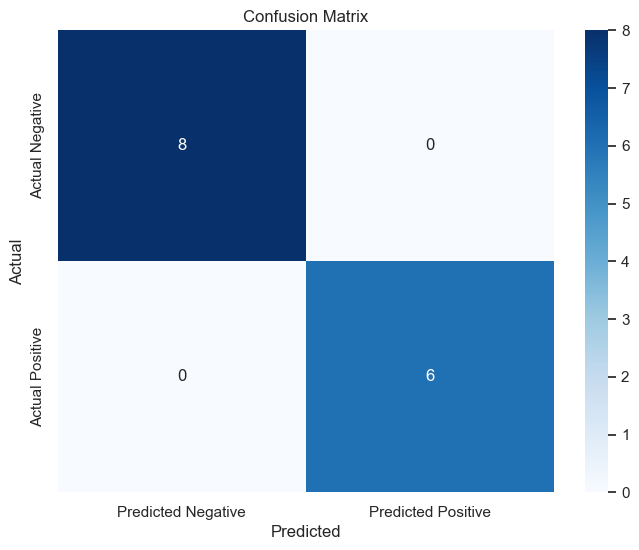

Accuracy: 1.00
Precision: 1.00
Recall (Sensitivity): 1.00
Specificity: 1.00
F1 Score: 1.00


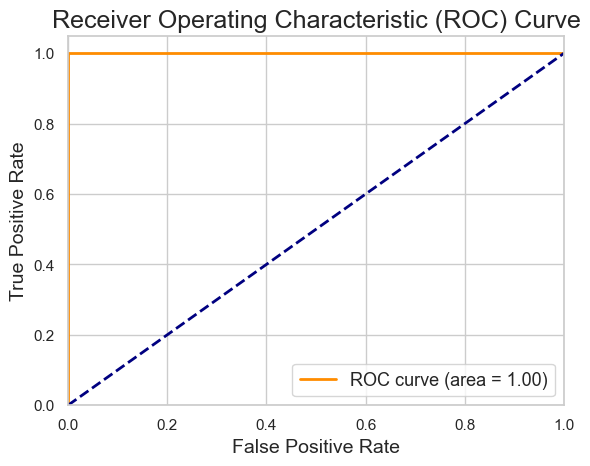

In [65]:
feature_count = 51

# Load the dataset
df = pd.read_csv(f'../Datasets/Dataset01/Feature_Select/dataset_{feature_count}.csv', index_col=0)

# Split the dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC area
y_scores = clf.decision_function(X_test)  # Decision function for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print various performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)  # Specificity calculation
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
plt.legend(loc='lower right', fontsize=13)
plt.show()